### Case Study

FTX allows customers to trade based on the size of Move for Bitcoin. If we can determine a model, which can forecast better than 50/50 accuracy, whether or not Bitcoins move will likely be above it's average, then we have an edge.

The catch is, how to predict whether future volatility will be above or below the rolling average (assuming that the rolling average is where the market adjusts to). Regardless, this will be a significant challenge and we will need state-of-the-art methods, whilst making sure we do not overfit.

### Imports

In [1]:
import numpy as np
import pandas as pd
from stratmanagerDaily import StrategyManager
import sklearn.mixture as mix
from ta.momentum import RSIIndicator
import matplotlib.pyplot as plt
import yfinance

### Data Extraction and Returns Overview

In [3]:
# Extract Data
start_date = "2005-01-1"
end_date = "2022-06-1"
    
symbol = "TATAMOTORS.NS"
input_dataa = {
                    'Close' : [99,100,111],
                    'Open' :  [99,100,111],
                    'Date' :["2017-12-27","2017-12-28","2017-12-27"],
                    'High' : [100,111,120],
                    'Low' : [98,99,90], 
                    'Volume' : [2000,2001,2002]
                    
            }

dff = pd.DataFrame(input_dataa)
dff.set_index("Date", inplace=True)

strat_mgr = StrategyManager(symbol, start_date, end_date,dff)
df = strat_mgr.df.copy()
df.head()

/Users/vipin/workspace/ai/my_own/MY_OWN/MODEL2/stratmanagerDaily.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Returns"] = df["Close"].pct_change()
/Users/vipin/workspace/ai/my_own/MY_OWN/MODEL2/stratmanagerDaily.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Range"] = df["High"] / df["Low"] - 1
/Users/vipin/workspace/ai/my_own/MY_OWN/MODEL2/stratmanagerDaily.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets
Date,,,,,,,,
2017-12-28,100,111,99,100,2001,0.010101,0.121212,0.121212


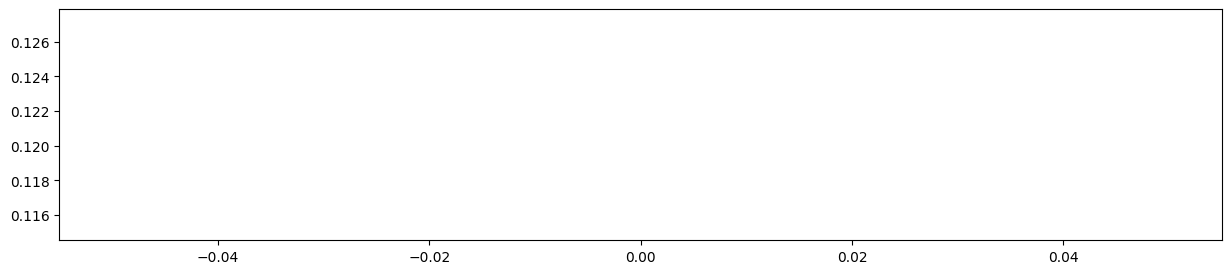

In [4]:
# Benchmark Returns Profile
fig = plt.figure(figsize = (15, 3))
plt.plot(df["Bench_C_Rets"].values)
plt.show()

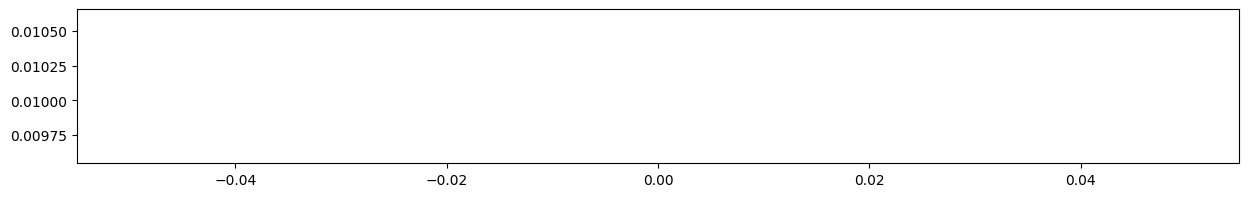

In [5]:
# Benchmark Returns Profile
fig = plt.figure(figsize = (15, 2))
plt.plot(df["Returns"].values)
plt.show()

In [5]:
# Benchmark Range Profile
fig = plt.figure(figsize = (15, 2))
plt.plot(df["Range"].values)
plt.show()

### Feature Engineering - Feature Expansion

In [6]:
# Create a copy
df_fe = df.copy()

##### Indicators

In [7]:
# Add RSI
rsi = RSIIndicator(close=df_fe["Close"], window=14).rsi()
df_fe["RSI"] = rsi
df_fe["RSI_Ret"] = df_fe["RSI"] / df_fe["RSI"].shift(1)

In [8]:
# Add Moving Average
df_fe["MA_12"] = df_fe["Close"].rolling(window=12).mean()
df_fe["MA_21"] = df_fe["Close"].rolling(window=21).mean()

In [9]:
# Day of Week
df_fe["DOW"] = df_fe.index.dayofweek

In [ ]:
# Rolling Cumulative Returns
df_fe["Roll_Rets"] = df_fe["Returns"].rolling(window=30).sum()

In [ ]:
# Rolling Cumulative Range
df_fe["Avg_Range"] = df_fe["Range"].rolling(window=30).mean()

##### Time Intervals

In [ ]:
# Add Time Intervals
t_steps = [1, 2]
t_features = ["Returns", "Range", "RSI_Ret"]
for ts in t_steps:
    for tf in t_features:
        df_fe[f"{tf}_T{ts}"] = df_fe[tf].shift(ts)

In [ ]:
# Show DataFrame
df_fe.tail(3)

### Feature Engineering - Feature Scaling

In [ ]:
# Correct for Stationarity
df_fs = df_fe.copy()
df_fs[["Open", "High", "Low", "Volume"]] = df_fs[["Open", "High", "Low", "Volume"]].pct_change()
df_fs

### Assess Data for ML Readiness

In [ ]:
# Check for NaN
df_fs.dropna(inplace=True)
print(df_fs.isnull().values.any())

In [ ]:
# Check for Inf values
dfobj = df_fs.isin([np.inf, -np.inf])
count = np.isinf(dfobj).values.sum()
count

In [ ]:
# Check for non-numerical objects
df_fs.info()

In [ ]:
# Describe DataFrame
df_fs.describe()

### Save Data

In [ ]:
# Save DataFrame
df_fs.to_csv(f"data/{symbol}.csv")